### Timeseries cluster analysis

In [1]:
# Initial imports
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt    

## Initial Settings
pd.set_option('max_columns', 60)

In [2]:
# Load the NBA Stats dataset
clusters_df = pd.read_csv("Resources/clustered_dataset.csv")
clusters_df.head()

,Player,year_born,Cluster 1,VORP 1,WS 1,Cluster 2,VORP 2,WS 2,Cluster 3,VORP 3,WS 3,Cluster 4,VORP 4,WS 4,Cluster 5,VORP 5,WS 5,Cluster 6,VORP 6,WS 6,Cluster 7,VORP 7,WS 7,Cluster 8,VORP 8,WS 8,Cluster 9,VORP 9,WS 9,Cluster 10,...,Cluster 12,VORP 12,WS 12,Cluster 13,VORP 13,WS 13,Cluster 14,VORP 14,WS 14,Cluster 15,VORP 15,WS 15,Cluster 16,VORP 16,WS 16,Cluster 17,VORP 17,WS 17,Cluster 18,VORP 18,WS 18,Cluster 19,VORP 19,WS 19,Cluster 20,VORP 20,WS 20,Cluster 21,VORP 21,WS 21
0,Tariq Abdul-Wahad,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.1,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Shareef Abdur-Rahim,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.8,9.7,8.0,1.6,8.1,7.0,1.3,5.4,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Courtney Alexander,1977,NaN,NaN,NaN,NaN,NaN,NaN,5.0,-1.2,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Malik Allen,1978,NaN,NaN,NaN,7.0,-1.1,0.9,0.0,-0.4,0.7,6.0,0.0,1.1,6.0,-0.3,1.0,0.0,-0.5,1.0,5.0,-0.5,1.0,0.0,-0.4,0.3,0.0,-0.3,0.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ray Allen,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.2,9.1,1.0,3.3,6.9,1.0,4.4,10.7,1.0,...,3.0,3.4,9.7,3.0,4.3,11.1,3.0,2.6,7.9,3.0,4.1,10.0,5.0,1.8,4.7,3.0,1.1,5.4,3.0,1.0,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DataFrame Verification

In [3]:
# Select line 5 starting from 0
example = clusters_df.iloc[4,:]
example

Player        Ray Allen
year_born          1975
Cluster 1           NaN
VORP 1              NaN
WS 1                NaN
                ...    
VORP 20             NaN
WS 20               NaN
Cluster 21          NaN
VORP 21             NaN
WS 21               NaN
Name: 4, Length: 65, dtype: object

In [4]:
# Confirm if na
pd.isna(example["Cluster 10"])

False

In [5]:
example["Cluster 1"]

nan

In [6]:
improvements = []
regressions = []


# Loop accross clusters
for index, example in clusters_df.iterrows():
    
    # To edit since at the moment we have 21 clusters
    for i in range(1,21):
        # if no nan is cluster i ; cluster i + 1 ; clust i is not cluster i + 1 - last
        if not pd.isna(example[f"Cluster {i}"]) and not pd.isna(example[f"Cluster {i+1}"]) and (example[f"Cluster {i}"] != example[f"Cluster {i+1}"]):
            if example[f"VORP {i}"] > example[f"VORP {i+1}"]:
                # Save as int and a list - regressions
                regressions.append((int(example[f"Cluster {i}"]),int(example[f"Cluster {i+1}"])))
            else:
                 # Save as int and a list - improvements
                improvements.append((int(example[f"Cluster {i}"]),int(example[f"Cluster {i+1}"])))

In [7]:
improvements

[(7, 0),
 (0, 6),
 (0, 5),
 (5, 0),
 (1, 3),
 (2, 1),
 (2, 3),
 (6, 7),
 (6, 7),
 (2, 5),
 (4, 2),
 (4, 2),
 (5, 4),
 (4, 0),
 (6, 7),
 (5, 3),
 (0, 6),
 (6, 0),
 (3, 7),
 (2, 4),
 (4, 2),
 (2, 1),
 (2, 3),
 (7, 8),
 (7, 0),
 (6, 7),
 (6, 0),
 (0, 6),
 (7, 8),
 (7, 8),
 (7, 8),
 (8, 7),
 (4, 2),
 (7, 0),
 (0, 6),
 (6, 8),
 (0, 7),
 (6, 0),
 (6, 5),
 (2, 3),
 (4, 5),
 (0, 5),
 (6, 7),
 (7, 6),
 (6, 7),
 (7, 0),
 (2, 4),
 (4, 5),
 (7, 3),
 (3, 1),
 (5, 3),
 (5, 3),
 (5, 0),
 (6, 8),
 (7, 8),
 (4, 5),
 (0, 5),
 (4, 5),
 (3, 1),
 (5, 3),
 (5, 3),
 (2, 1),
 (6, 8),
 (7, 8),
 (6, 7),
 (7, 8),
 (4, 0),
 (4, 2),
 (0, 6),
 (6, 7),
 (6, 7),
 (6, 0),
 (6, 0),
 (0, 6),
 (6, 0),
 (2, 1),
 (2, 1),
 (3, 1),
 (2, 3),
 (6, 5),
 (5, 7),
 (7, 5),
 (0, 5),
 (5, 0),
 (8, 7),
 (7, 8),
 (7, 8),
 (5, 2),
 (2, 1),
 (2, 1),
 (4, 0),
 (2, 4),
 (4, 2),
 (0, 7),
 (4, 2),
 (0, 7),
 (7, 0),
 (6, 0),
 (4, 2),
 (4, 2),
 (5, 3),
 (3, 1),
 (5, 3),
 (2, 4),
 (6, 0),
 (6, 0),
 (6, 7),
 (6, 7),
 (2, 3),
 (4, 5),
 (0, 6),
 

In [8]:
regressions

[(8, 7),
 (6, 0),
 (3, 5),
 (5, 3),
 (1, 2),
 (3, 2),
 (7, 6),
 (7, 6),
 (7, 6),
 (3, 2),
 (2, 5),
 (5, 4),
 (2, 4),
 (3, 2),
 (5, 4),
 (1, 4),
 (2, 4),
 (2, 4),
 (2, 4),
 (2, 5),
 (2, 4),
 (4, 5),
 (7, 0),
 (2, 3),
 (3, 5),
 (3, 5),
 (2, 5),
 (5, 4),
 (7, 0),
 (7, 3),
 (3, 5),
 (5, 3),
 (3, 5),
 (5, 3),
 (1, 2),
 (3, 2),
 (2, 3),
 (3, 4),
 (1, 5),
 (5, 4),
 (8, 7),
 (7, 6),
 (6, 0),
 (8, 7),
 (8, 7),
 (3, 5),
 (6, 0),
 (0, 4),
 (4, 0),
 (6, 4),
 (2, 4),
 (6, 0),
 (7, 6),
 (8, 7),
 (7, 6),
 (6, 0),
 (5, 4),
 (7, 6),
 (5, 2),
 (3, 2),
 (2, 4),
 (7, 6),
 (8, 7),
 (4, 2),
 (2, 3),
 (5, 4),
 (5, 4),
 (1, 7),
 (1, 5),
 (5, 3),
 (3, 5),
 (5, 4),
 (3, 5),
 (3, 5),
 (8, 7),
 (8, 7),
 (7, 0),
 (6, 0),
 (3, 2),
 (2, 4),
 (5, 0),
 (5, 4),
 (5, 4),
 (2, 4),
 (1, 3),
 (3, 5),
 (3, 5),
 (1, 2),
 (1, 2),
 (7, 0),
 (7, 6),
 (8, 7),
 (8, 7),
 (7, 6),
 (8, 7),
 (2, 4),
 (2, 4),
 (7, 6),
 (6, 0),
 (7, 6),
 (7, 6),
 (6, 0),
 (7, 6),
 (0, 6),
 (1, 3),
 (3, 1),
 (1, 2),
 (1, 3),
 (1, 2),
 (3, 2),
 (5, 0),
 

In [9]:
# each combination = make a dictionnary. Keys are is the tuples and values is aggregation of tuples + to DF gor eacg regression and counter

## Aggregation count for improvements and regressions

In [10]:
# Improvement to DF
improvements_list = dict(Counter(improvements))

In [11]:
improvements_df = pd.DataFrame({"Count":[x for x in list(improvements_list)], "Number": [improvements_list[x] for x in list(improvements_list)]})
improvements_df

,Count,Number
0,"(7, 0)",11
1,"(0, 6)",65
2,"(0, 5)",32
3,"(5, 0)",13
4,"(1, 3)",11
5,"(2, 1)",63
6,"(2, 3)",27
7,"(6, 7)",121
8,"(2, 5)",26
9,"(4, 2)",69


<AxesSubplot:xlabel='Count'>

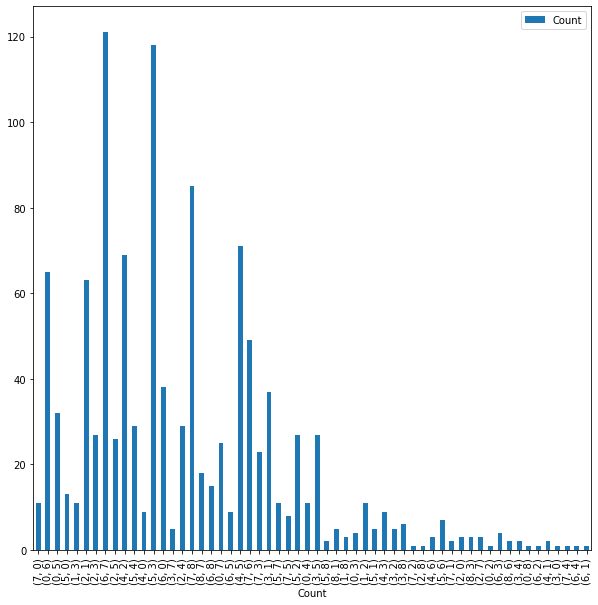

In [12]:
# plot the classes
improvements_df.plot.bar(figsize=(10,10),x='Count', y='Number', label='Count') 

In [13]:
# Regressions to DF

In [14]:
regressions_list = dict(Counter(regressions))

In [15]:
regressions_df = pd.DataFrame({"Count":[x for x in list(regressions_list)], "Number": [regressions_list[x] for x in list(regressions_list)]})
regressions_df

,Count,Number
0,"(8, 7)",82
1,"(6, 0)",61
2,"(3, 5)",115
3,"(5, 3)",21
4,"(1, 2)",66
5,"(3, 2)",25
6,"(7, 6)",124
7,"(2, 5)",34
8,"(5, 4)",67
9,"(2, 4)",88


<AxesSubplot:xlabel='Count'>

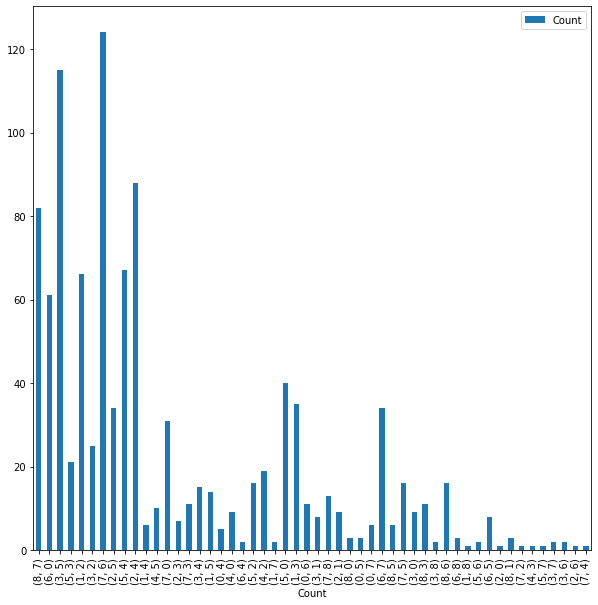

In [16]:
# plot the classes
regressions_df.plot.bar(figsize=(10,10),x='Count', y='Number', label='Count') 